# Numerical Solutions of Ordinary Differential Equations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

This notebook is an introduction to the classical methods that can be use to numerically solve the ordinary differential eqautions.

## Problem to solve

$$\frac{du}{dt} = F(t,u), \qquad u(t_0) = u_0$$

Mesh points : 
$$t_0 < t_1, < t_2 < t_3 < \cdots$$
Uniform step size : 
$$h = t_{k+1} - t_k > 0$$
And then: $$ t_k = t_0 + kh$$

At each iteration $$u_k \approx u(t_k),\qquad k=0,1,2,3,\cdots$$ with the error $$E = u_k - u(t_k)$$

## Taylor Methods

### First order = Euler method

$$u_{k+1} = u_k + (t_{k+1} - t_k)F(t_k, u_k) = u_k + hF(t_k, u_k)$$

* Single step method
* The error is cumulative over time and more or less in proportion to the step size. 

**Example 1**: $$u(t) = e^t, \qquad u(0) = 1$$

$$u_k = (1+h) u_k = (1+h)^k u_0 = (1+h)^k$$

$$E(t_k) = E_k = (1+h)^k - e^{t_k} = (1+h)^k - e^{kh}$$

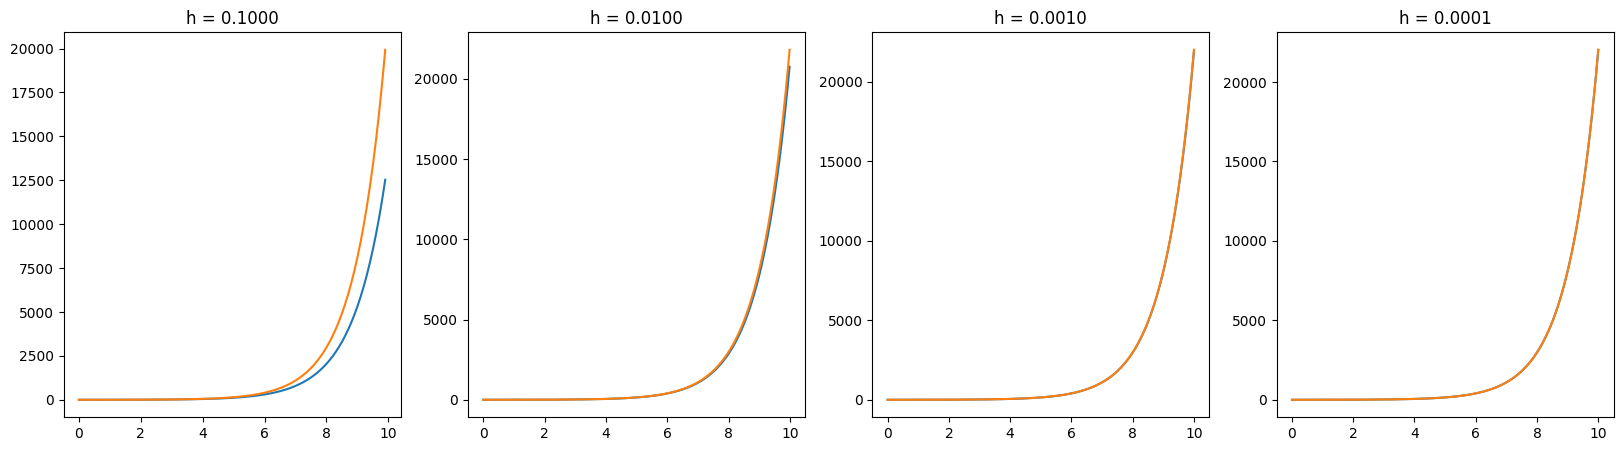

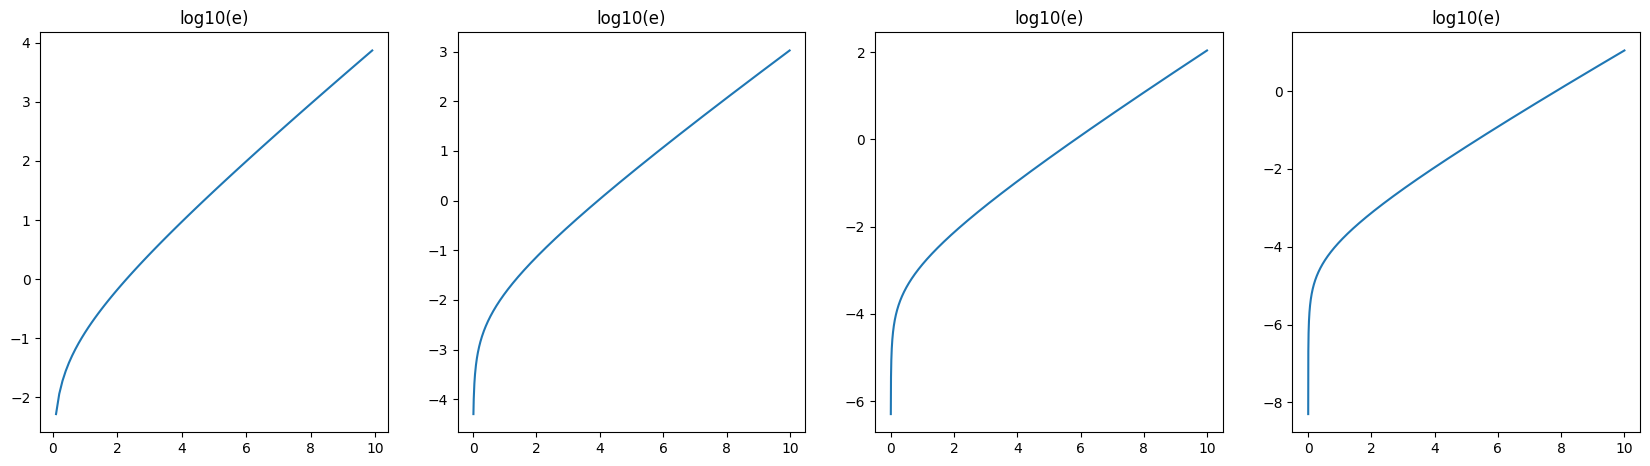

In [3]:
fig1 = plt.figure(figsize = (20, 5))
fig2 = plt.figure(figsize = (20, 5))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.1)
i = 1
hs = [0.1, 0.01, 0.001, 0.0001]
for h in hs:
    N = 10 / h
    ks = np.arange(0,N)
    t = ks*h
    U = np.power((1+h),ks)
    ax1 = fig1.add_subplot(1, len(hs), i)
    ax1.set_title('h = %.4f' % h)
    ax1.plot(t,U)
    ax1.plot(t, np.exp(t))
    e = np.abs(U - np.exp(t))
    ax2 = fig2.add_subplot(1, len(hs), i)
    ax2.set_title('log10(e)')
    ax2.plot(t[1:],np.log10(e[1:]))
    i = i+1

**Example 2**:
$$\dot{u} = (1 - \frac{4}{3}t)u,\qquad u(0) = 1$$

$$u_{k+1} = u_k + h (1-\frac{4}{3}t_k)u_k$$

Solution analytique : $$u(t) = e^{t-\frac{2}{3}t^2}$$

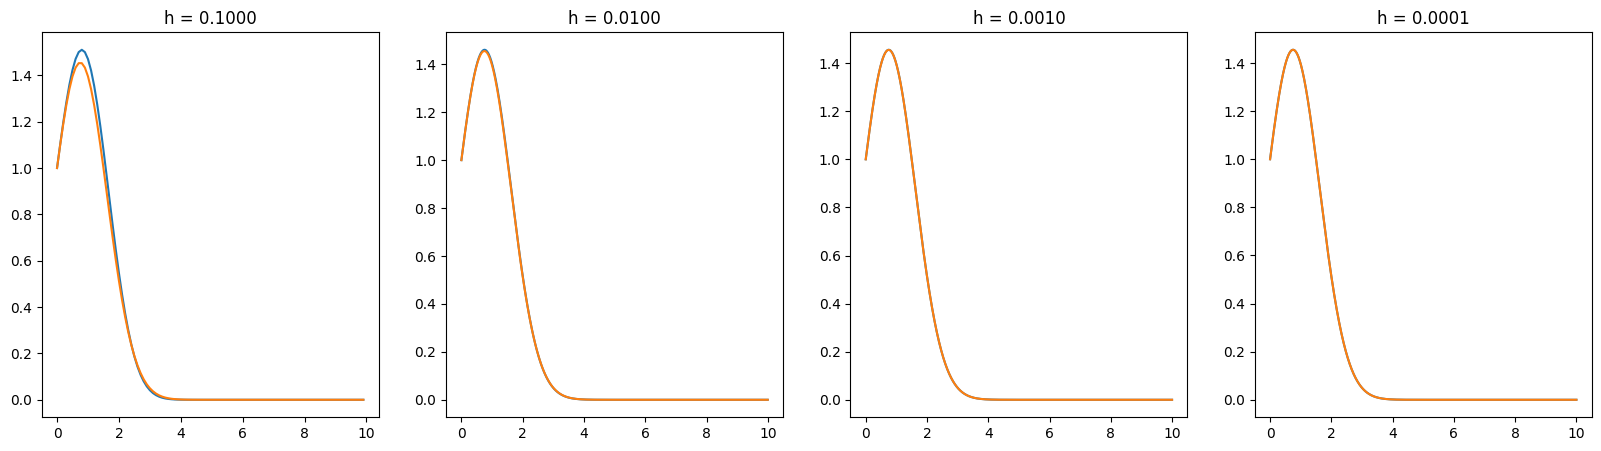

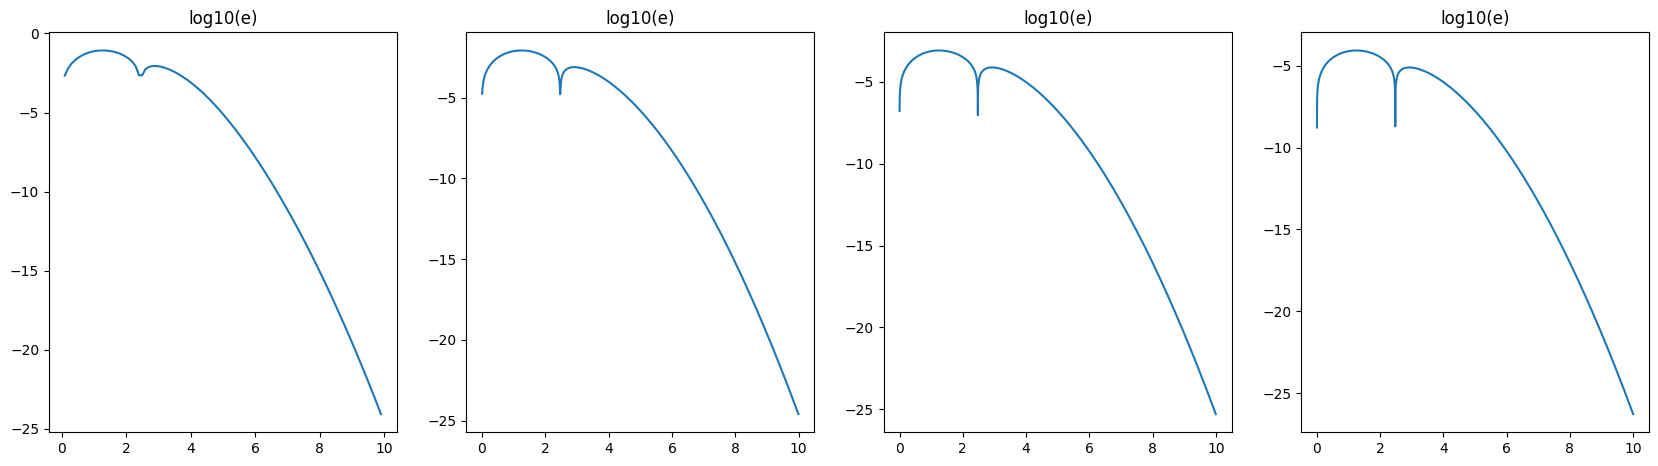

In [4]:
def sol(t):
    return np.exp(t - 2./3.*np.power(t,2))
def ukp1(uk,tk,h):
    return uk*(1 + (h*(1-4./3*tk)))
fig1 = plt.figure(figsize = (20, 5))
fig2 = plt.figure(figsize = (20, 5))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.1)
i = 1
hs = [0.1, 0.01, 0.001, 0.0001]
for h in hs:
    N = int(10 / h)
    ks = np.arange(0,N)
    t = ks*h
    U = np.ones(N, dtype='f8')
    for k in ks[:-1]:
        U[k+1] = ukp1(U[k],t[k],h)
    ax1 = fig1.add_subplot(1, len(hs), i)
    ax1.set_title('h = %.4f' % h)
    ax1.plot(t,U)
    ax1.plot(t, sol(t))
    e = np.abs(U - sol(t))
    ax2 = fig2.add_subplot(1, len(hs), i)
    ax2.set_title('log10(e)')
    ax2.plot(t[1:],np.log10(e[1:]))
    i = i+1

As $h$ decreases by a factor of $\frac{1}{10}$ the error also decreases by a factor of $\frac{1}{10}$ ($-1$ in the log scale).

### Second order

$$\frac{du}{dt} = F(t,u), \qquad u(t_0) = u_0$$

$$\frac{d^2u}{dt^2} = \frac{d}{dt}F(t,u(t)) = \frac{\partial F}{\partial t}(t, u) +  \frac{\partial F}{\partial u}(t, u)\frac{du}{dt} =  \frac{\partial F}{\partial t}(t, u) +  \frac{\partial F}{\partial u}(t_k, u_k)F(t,u)$$

So : $$\begin{align} u_{k+1} &= u_k + h\frac{du}{dt}(t_k,u_k) + \frac{1}{2}h^2\frac{d^2u}{dt^2}(t_k,u_k)\\ 
&= u_k + hF(t_k, u_k) + \frac{1}{2}h^2\left(\frac{\partial F}{\partial t}(t_k, u_k) +  \frac{\partial F}{\partial u}(t_k, u_k)F(t_k, u_k)\right)\end{align}$$

**Example**:
$$\dot{u} = (1 - \frac{4}{3}t)u,\qquad u(0) = 1$$

$$u_{k+1} = u_k + h(1-\frac{4}{3}t_k)u_k + \frac{h^2}{2}\left[-\frac{4}{3}u_k + \left(1-\frac{4}{3}t_k\right)^2u_k\right],\qquad u_0 = 1$$

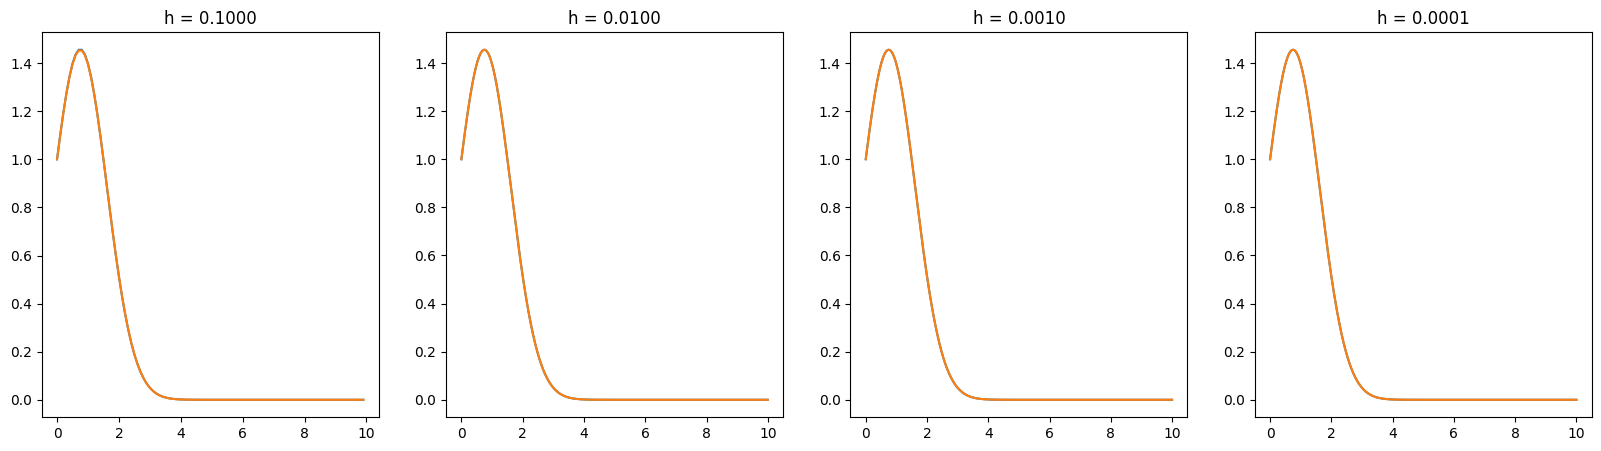

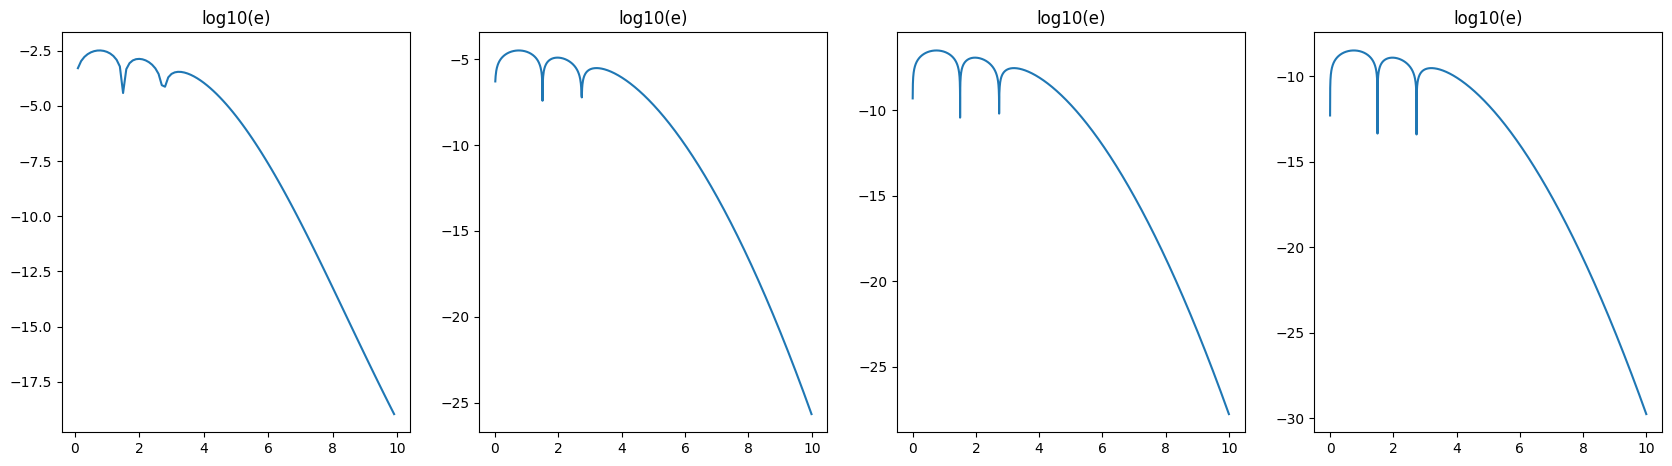

In [5]:
def sol(t):
    return np.exp(t - 2./3.*np.power(t,2))
def ukp1o2(uk,tk,h):
    return uk*(1. + h*(1-4./3*tk) + (h**2/2.)*(-4./3 + (1-4./3*tk)**2))
fig1 = plt.figure(figsize = (20, 5))
fig2 = plt.figure(figsize = (20, 5))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.1)
i = 1
hs = [0.1, 0.01, 0.001, 0.0001]
for h in hs:
    N = int(10 / h)
    ks = np.arange(0,N)
    t = ks*h
    U = np.ones(N, dtype='f8')
    for k in ks[:-1]:
        U[k+1] = ukp1o2(U[k],t[k],h)
    ax1 = fig1.add_subplot(1, len(hs), i)
    ax1.set_title('h = %.4f' % h)
    ax1.plot(t,U)
    ax1.plot(t, sol(t))
    e = np.abs(U - sol(t))
    ax2 = fig2.add_subplot(1, len(hs), i)
    ax2.set_title('log10(e)')
    ax2.plot(t[1:],np.log10(e[1:]))
    i = i+1

As $h$ decreases by a factor of $\frac{1}{10}$ the error also decreases by a factor of $\frac{1}{100}$ ($-2$ in the log scale).

**The error decreases faster with the decreasing step**

### Error analysis

$$|u_k - u(t_k)| \leq Mh^n,\qquad M > 0,\qquad n=\text{Taylor order}$$ 

Decreasing the step size by a factor $\frac{1}{10}$ will decrease the overall error by a factor of about $10^{-n}$.

<span style="color:red">**Limitations**</span> : using Taylor methods with orders more than 2 is never used as it leads to complex equations that induce too many round errors. Integral equations are prefered.

## Equivalent Integral Equation

**Principle**

$$\frac{du}{dt} = F(t,u), \qquad u(t_0) = u_0$$

$$u(t) - u(t_0) = \int_{t_0}^t \dot{u}(s)ds = \int_{t_0}^t F(s,u(s))ds$$

$$\iff u(t) = u(t_0) + \int_{t_0}^t F(s,u(s))ds$$

### Implicit and Predictor–Corrector Methods

$$u(t_{k+1}) = u(t_k) + \underbrace{\int_{t_k}^{t_{k+1}} F(s,u(s))ds}_{\approx hF(t_k,u(t_k))\,\text{in Euler method}}$$

If we approximate the integral with :
* a rectangle integration $\iff$ Euler method
* a trapezoid integration $\iff$ implicit scheme

#### Implicit scheme

$$ \int_{t_k}^{t_{k+1}} F(s,u(s))ds \approx \frac{1}{2}h\left[F(t_k,u(t_k)) + F(t_{k+1},u(t_{k+1}))\right]$$

$$u(t_{k+1}) = u(t_k) +\frac{1}{2}h\left[F(t_k,u(t_k)) + F(t_{k+1},u(t_{k+1}))\right]$$

<span style="color:red">**Limitations**</span> : it depends on both sides of $u_{k+1}$ wich can leads to untracktable systems.

Nevertheless, in some simple cases it is possible to express $u_{k+1}$ as a function of $u_k$ like in the next example.

**Example**:
$$\dot{u} = (1 - \frac{4}{3}t)u,\qquad u(0) = 1$$

$$u_{k+1} = u_k + \frac{1}{2}h\left[\left(1-\frac{4}{3}t_k\right)u_k + \left(1-\frac{4}{3}t_{k+1}\right)u_{k+1}\right]$$

$$u_{k+1} = \frac{1+1/2h-2/3ht_k}{1-1/2h+2/3h(t_k+h)}u_k$$

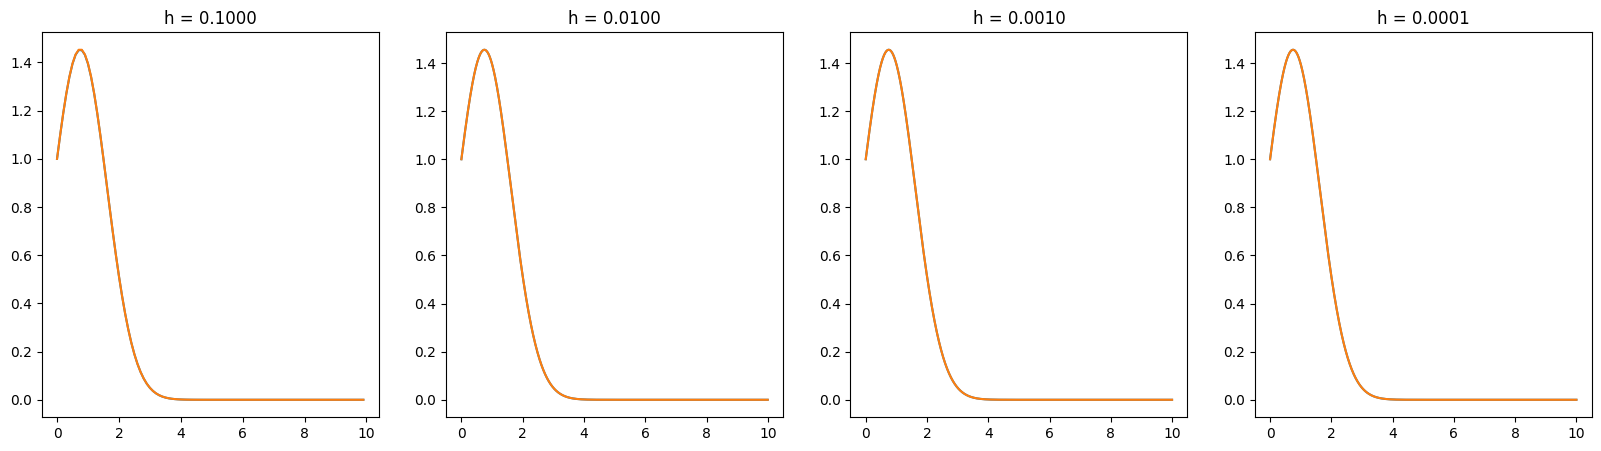

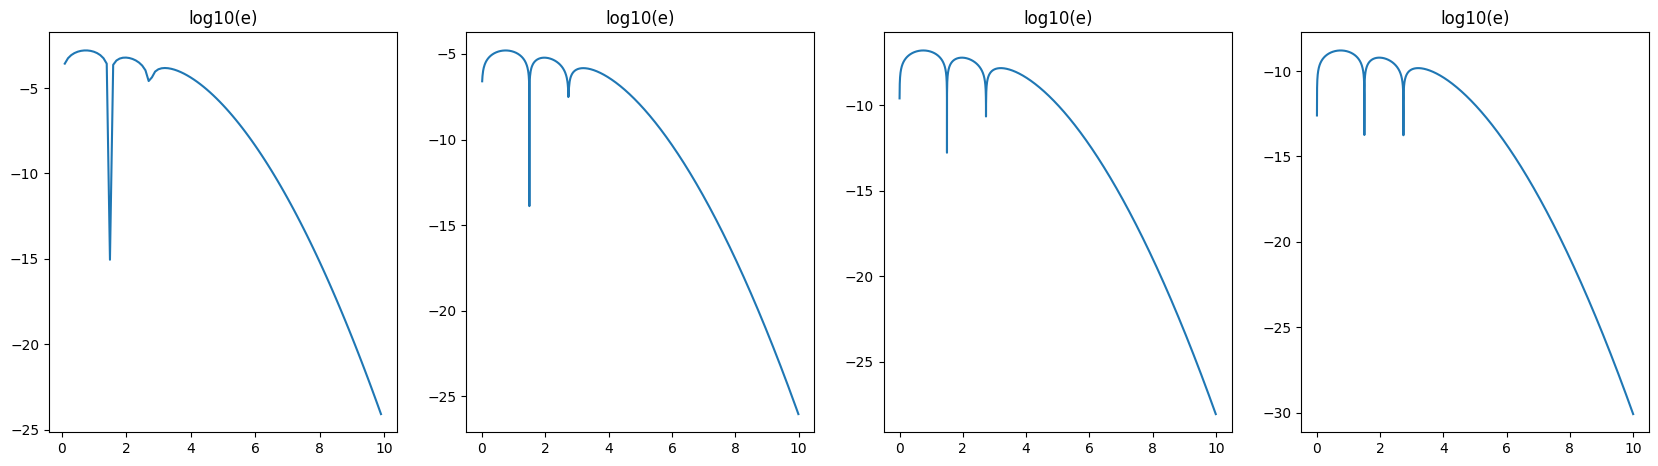

In [6]:
def sol(t):
    return np.exp(t - 2./3.*np.power(t,2))
def ukp1Implicit(uk,tk,h):
    return uk*(1. + 0.5*h - 2.*h*tk/3.) / (1-0.5*h+2.*h*(tk+h)/3.)
fig1 = plt.figure(figsize = (20, 5))
fig2 = plt.figure(figsize = (20, 5))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.1)
i = 1
hs = [0.1, 0.01, 0.001, 0.0001]
for h in hs:
    N = int(10 / h)
    ks = np.arange(0,N)
    t = ks*h
    U = np.ones(N, dtype='f8')
    for k in ks[:-1]:
        U[k+1] = ukp1Implicit(U[k],t[k],h)
    ax1 = fig1.add_subplot(1, len(hs), i)
    ax1.set_title('h = %.4f' % h)
    ax1.plot(t,U)
    ax1.plot(t, sol(t))
    e = np.abs(U - sol(t))
    ax2 = fig2.add_subplot(1, len(hs), i)
    ax2.set_title('log10(e)')
    ax2.plot(t[1:],np.log10(e[1:]))
    i = i+1

We see that the trapezoid method is a second order method as a reduction in step by $\frac{1}{10}$ increases the accuracy by, roughly, a factor of $\frac{1}{100}$ ($-2$ in the log scale).

### Improved Euler Method

To build this method we start from the implicit formulation and just replace $u_{k+1}$ on the right hand side by its Euler approximation. We obtain:

$$\begin{align}u_{k+1} &= u_k +\frac{1}{2}h\left[F(t_k,u_k) + F(t_{k+1},u_{k+1})\right]\\
&= u_k +\frac{1}{2}h\left[F(t_k,u_k) + F(t_k + h,u_k+hF(t_k,u_k))\right]
\end{align}$$

**Example**:
$$\dot{u} = (1 - \frac{4}{3}t)u,\qquad u(0) = 1$$

$$\begin{align}u_{k+1} &= u_k + \frac{1}{2}h\left[\left(1-\frac{4}{3}t_k\right)u_k + \left(1-\frac{4}{3}t_{k+1}\right)u_{k+1}\right]\\
&= u_k + \frac{1}{2}h\left[\left(1-\frac{4}{3}t_k\right)u_k + \left(1-\frac{4}{3}(t_k+h)\right)\left(u_k+h(1-\frac{4}{3}t_k)u_k\right)\right]\\
&= \left[\left(1 - \frac{2}{3}h^2 \right)\left[1+ h\left(1-\frac{4}{3}t_k\right)\right] + \frac{1}{2}h^2\left(1-\frac{4}{3}t_k\right)^2 \right]u_k\end{align}$$

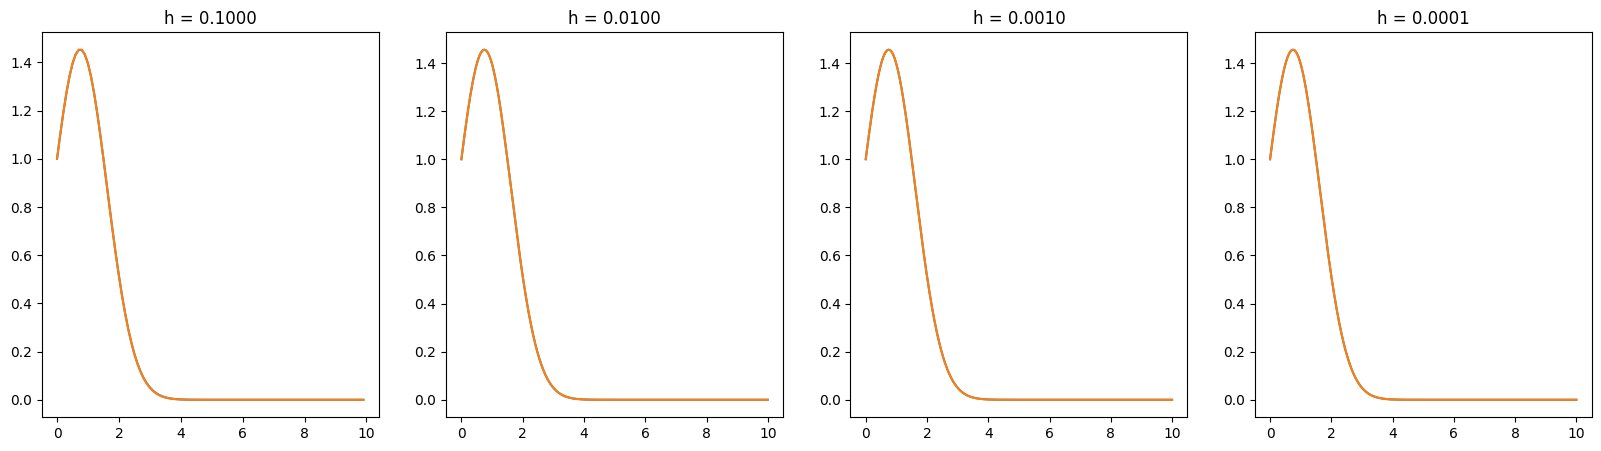

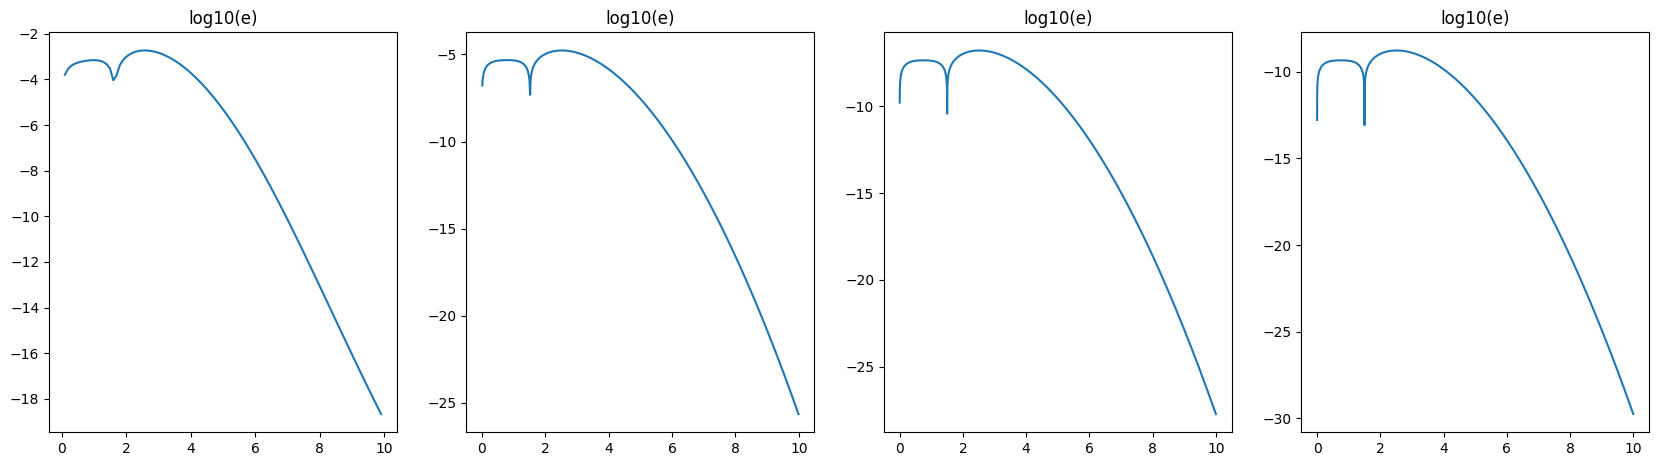

In [7]:
def sol(t):
    return np.exp(t - 2./3.*np.power(t,2))
def ukp1Explicit(uk,tk,h):
    return uk*((1- h**2 * 2./3.)*(1+h*(1-4.*tk/3.)) + 0.5*h**2*(1-tk*4./3.)**2)
fig1 = plt.figure(figsize = (20, 5))
fig2 = plt.figure(figsize = (20, 5))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.1)
i = 1
hs = [0.1, 0.01, 0.001, 0.0001]
for h in hs:
    N = int(10 / h)
    ks = np.arange(0,N)
    t = ks*h
    U = np.ones(N, dtype='f8')
    for k in ks[:-1]:
        U[k+1] = ukp1Explicit(U[k],t[k],h)
    ax1 = fig1.add_subplot(1, len(hs), i)
    ax1.set_title('h = %.4f' % h)
    ax1.plot(t,U)
    ax1.plot(t, sol(t))
    e = np.abs(U - sol(t))
    ax2 = fig2.add_subplot(1, len(hs), i)
    ax2.set_title('log10(e)')
    ax2.plot(t[1:],np.log10(e[1:]))
    i = i+1

We see that the Improved Euler Method is a second order method as a reduction in step by $\frac{1}{10}$ increases the accuracy by, roughly, a factor of $\frac{1}{100}$ ($-2$ in the log scale).

### Midpoint Method

$$ \int_{t_k}^{t_{k+1}} F(s,u(s))ds \approx hF\left(t_k + \frac{1}{2}h,u(t_k+\frac{1}{2}h)\right)$$

With Euler Method : $$u(t_k+\frac{1}{2}h) \approx u_k + \frac{1}{2}hF(t_k,u_k)$$

Then: 
$$u_{k+1} = u_k +hF\left(t_k + \frac{1}{2}h, u_k + \frac{1}{2}hF(t_k,u_k)\right)$$

**Example**:
$$\dot{u} = (1 - \frac{4}{3}t)u,\qquad u(0) = 1$$

$$u_{k+1} = u_k\left[1+ h\left(1 - \frac{4}{3}t_k - \frac{4}{6}h\right)\left(\frac{h}{2}-\frac{4}{6}ht_k + 1\right)\right]$$

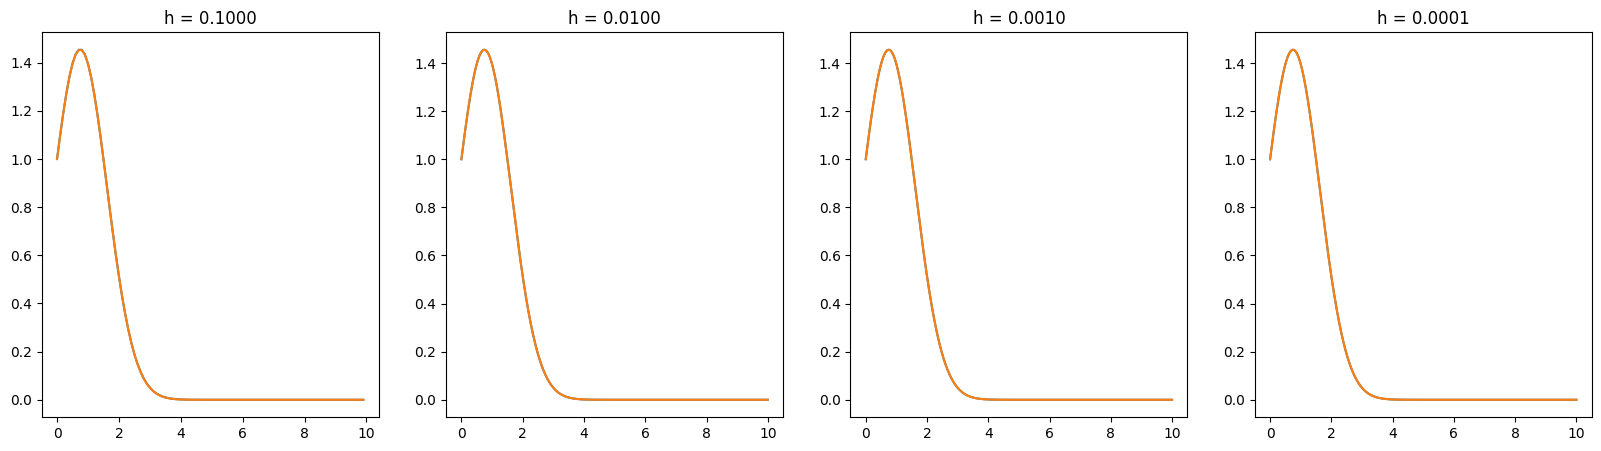

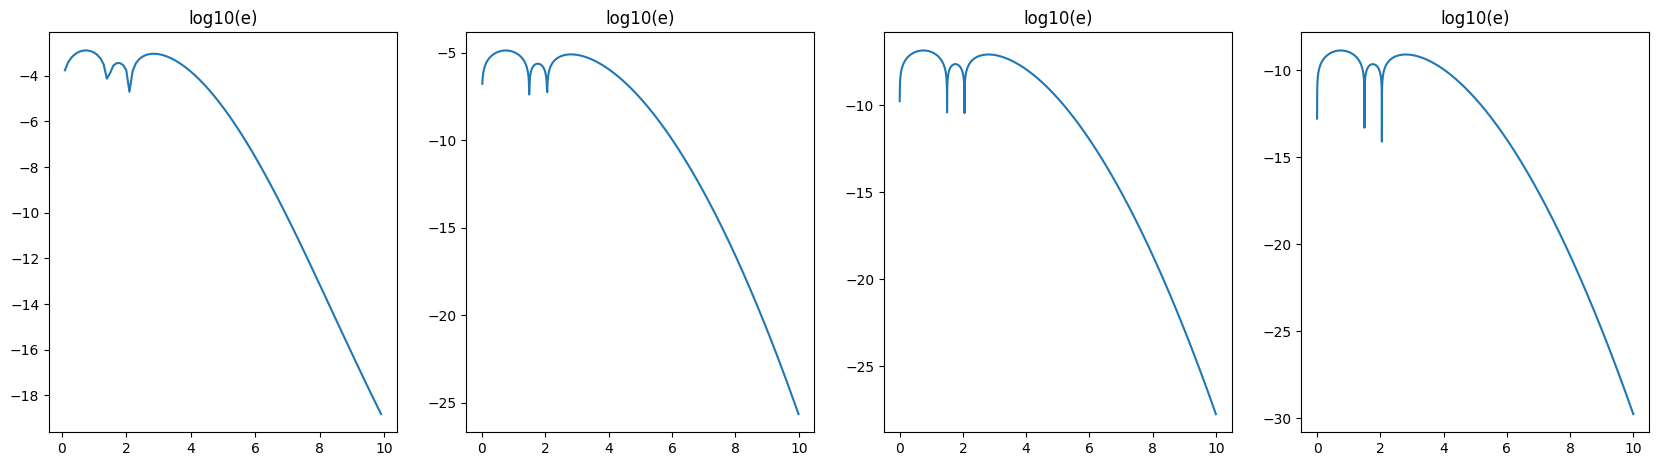

In [8]:
def sol(t):
    return np.exp(t - 2./3.*np.power(t,2))
def ukp1MM(uk,tk,h):
    return uk*(1 + h*(1.-4.*tk/3.-4.*h/6.)*(0.5*h-4.*tk*h/6.+1))
fig1 = plt.figure(figsize = (20, 5))
fig2 = plt.figure(figsize = (20, 5))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.1)
i = 1
hs = [0.1, 0.01, 0.001, 0.0001]
for h in hs:
    N = int(10 / h)
    ks = np.arange(0,N)
    t = ks*h
    U = np.ones(N, dtype='f8')
    for k in ks[:-1]:
        U[k+1] = ukp1MM(U[k],t[k],h)
    ax1 = fig1.add_subplot(1, len(hs), i)
    ax1.set_title('h = %.4f' % h)
    ax1.plot(t,U)
    ax1.plot(t, sol(t))
    e = np.abs(U - sol(t))
    ax2 = fig2.add_subplot(1, len(hs), i)
    ax2.set_title('log10(e)')
    ax2.plot(t[1:],np.log10(e[1:]))
    i = i+1

$\Rightarrow$ second order 

### Runge-Kutta Methods

$$ u_{k+1} = u_k + \sum_{i=1}^m c_i F(t_{i,k},u_{i,k}), \qquad t_k \leq t_{i,k} \leq t_{k+1}$$

#### **Two terms expression of Runge-Kutta Methods = second order methods**

$$t_{k,1} = t_k,\qquad t_{k,2} = t_k+\lambda h$$
$$\begin{align}u_{k+1} &= u_k + h\left[aF(t_k,u_k) + bF(t_{k,2},u_{k,2})\right]\\
&= u_k + h\left[aF(t_k,u_k) + bF \left( t_k + \lambda h, u_k + \lambda h F(t_k,u_k) \right)\right]\end{align}$$

According to the order 2 Taylor expansion we must choose:
$$a+b = 1,\qquad b\lambda = \frac{1}{2}$$
$$\iff a = 1-\mu, \qquad b=\mu,\qquad \lambda = \frac{1}{2\mu},\qquad \mu \in ]0,1]$$

and the formulation becomes:
$$u_{k+1} = u_k + h\left[(1-\mu)F(t_k,u_k) + \mu F \left( t_k + \frac{h}{2 \mu}, u_k + \frac{h}{2\mu} F(t_k,u_k) \right)\right]$$

If $\mu = \frac{1}{2}$ $\Rightarrow$ Improved Euler Method

If $\mu = 1$ $\Rightarrow$ Midpoint Method

And there is no special reason to choose other values of $\mu$

#### **Fourth order Runge-Kutta Methods = RK4**

$$u_{k+1} = u_k + \frac{h}{6}\left[F(t_k,u_k) + 2F(t_{k,2},u_{k,2}) + 2F(t_{k,3},u_{k,3})+ F(t_{k,4},u_{k,})\right]$$
where:
$$\begin{align}
t_{2,k} &= t_k + \frac{1}{2}h,\qquad &u_{2,k} &= u_k + \frac{1}{2}hF(t_k,u_k),\\
t_{3,k} &= t_k + \frac{1}{2}h,\qquad &u_{3,k} &= u_k + \frac{1}{2}hF(t_{2,k},u_{2,k}),\\
t_{4,k} &= t_k + h,\qquad &u_{4,k} &= u_k + hF(t_{3,k},u_{3,k}),
\end{align}$$

**Example with RK4**:
$$\dot{u} = (1 - \frac{4}{3}t)u,\qquad u(0) = 1$$

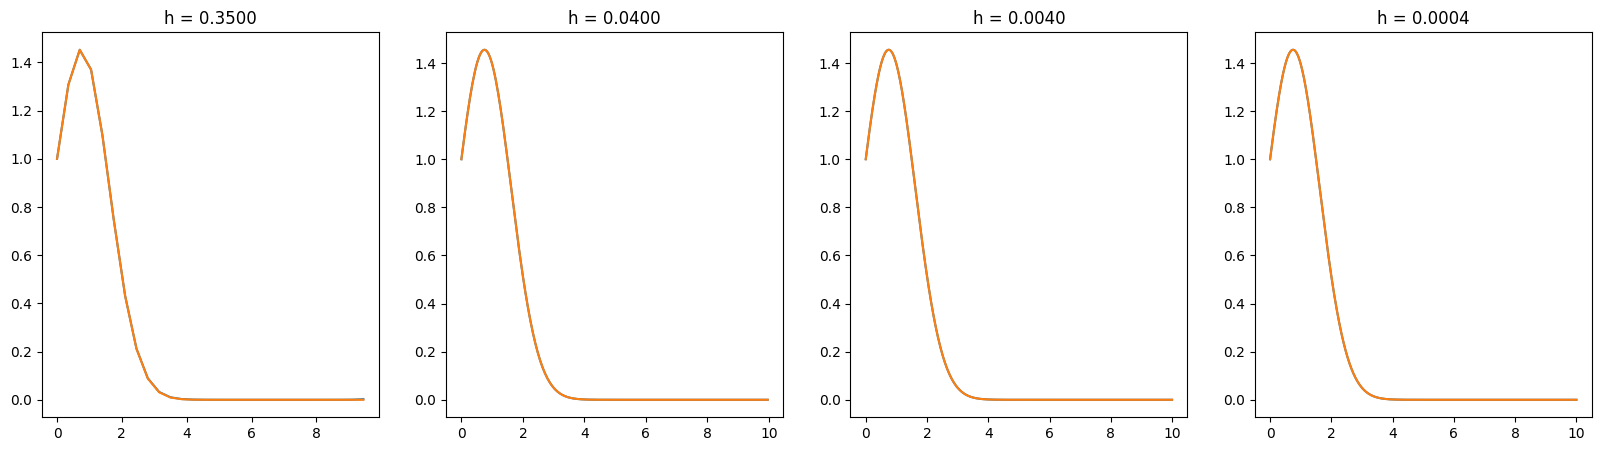

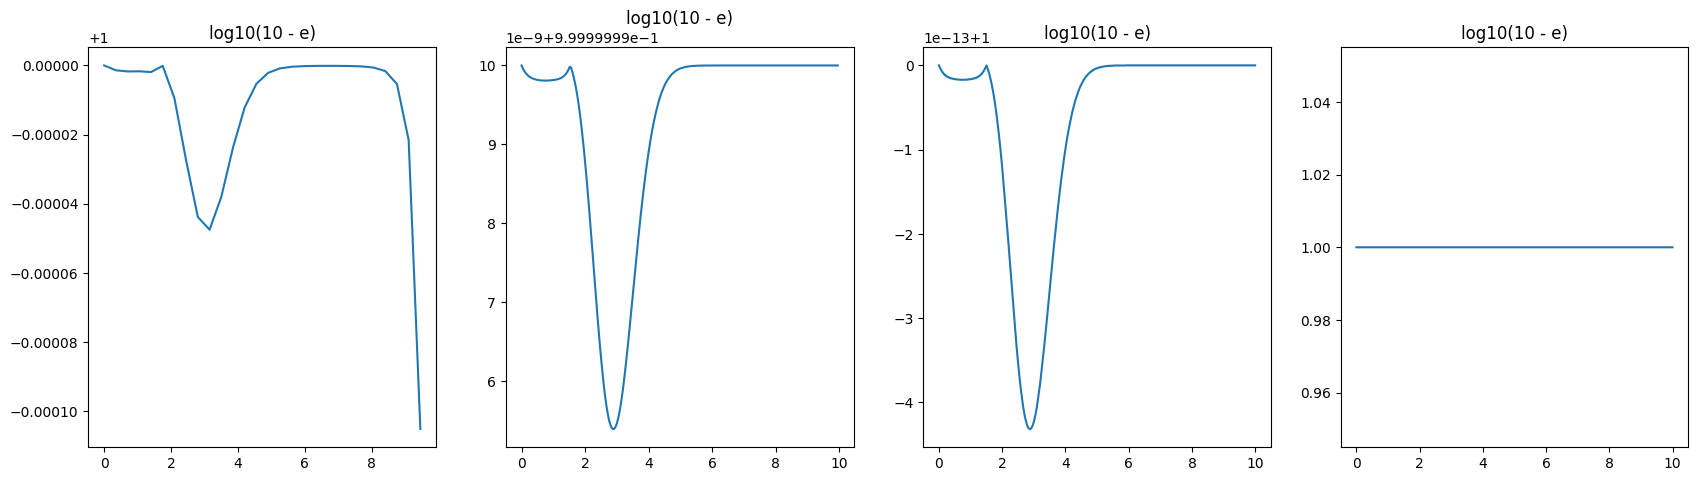

In [9]:
def F(tk,uk):
    return (1-4.*tk/3.)*uk
def sol(t):
    return np.exp(t - 2./3.*np.power(t,2))
def ukp1RK4(uk,tk,h):
    Fkk = F(tk,uk)
    t2k = tk + 0.5*h
    u2k = uk + 0.5*h*Fkk
    F2k2k = F(t2k,u2k)
    t3k = t2k    
    u3k = uk + 0.5*h*F2k2k
    F3k3k = F(t3k,u3k)
    t4k = tk + h
    u4k = uk + h*F3k3k
    F4k4k = F(t4k,u4k)
    return uk + (h/6.)*(Fkk + 2*F2k2k + 2*F3k3k + F4k4k)
fig1 = plt.figure(figsize = (20, 5))
fig2 = plt.figure(figsize = (20, 5))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.1)
i = 1
hs = 4*np.array([0.1, 0.01, 0.001, 0.0001])
hs[0] = 0.35
for h in hs:
    N = int(10 / h)
    ks = np.arange(0,N)
    t = ks*h
    U = np.ones(N, dtype='f8')
    for k in ks[:-1]:
        U[k+1] = ukp1RK4(U[k],t[k],h)
    ax1 = fig1.add_subplot(1, len(hs), i)
    ax1.set_title('h = %.4f' % h)
    ax1.plot(t,U)
    ax1.plot(t, sol(t))
    e = np.abs(U - sol(t))
    ax2 = fig2.add_subplot(1, len(hs), i)
    ax2.set_title('log10(10 - e)')
    ax2.plot(t,np.log10(10 - e))
    i = i+1

Error is almost zero for small h even if we multiply h by 4 (as we need 4 intermediate $t_{k,i})$, the accuracy is really better than the previous 2 order methods.

### Problems of convergence : the Stiff differential equations

$$\frac{du}{dt} = -250 u, \qquad u(0) = 1$$

Analytical solution : $$u(t) = e^{-250t}$$

h = 0.1000
At time = 1 where k = 10
Euler approx = 6.34E+13
Imp. Euler approx = 3.99E+24
RK4 approx = 2.81E+41
h = 0.0100
At time = 1 where k = 100
Euler approx = 4.07E+17
Imp. Euler approx = 1.22E+21
RK4 approx = 1.54E-19
h = 0.0060
At time = 1 where k = 166
Euler approx = 1.07E-50
Imp. Euler approx = 1.31E-34
RK4 approx = 3.30E-94
h = 0.0010
At time = 1 where k = 1000
Euler approx = 1.15E-125
Imp. Euler approx = 6.17E-108
RK4 approx = 2.70E-109


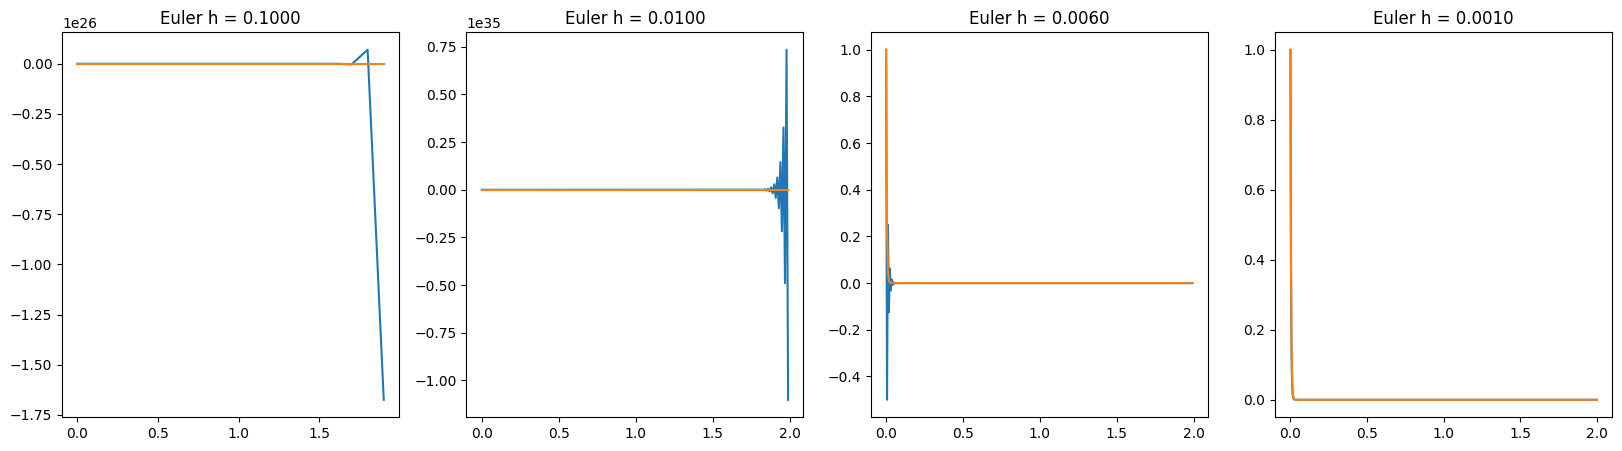

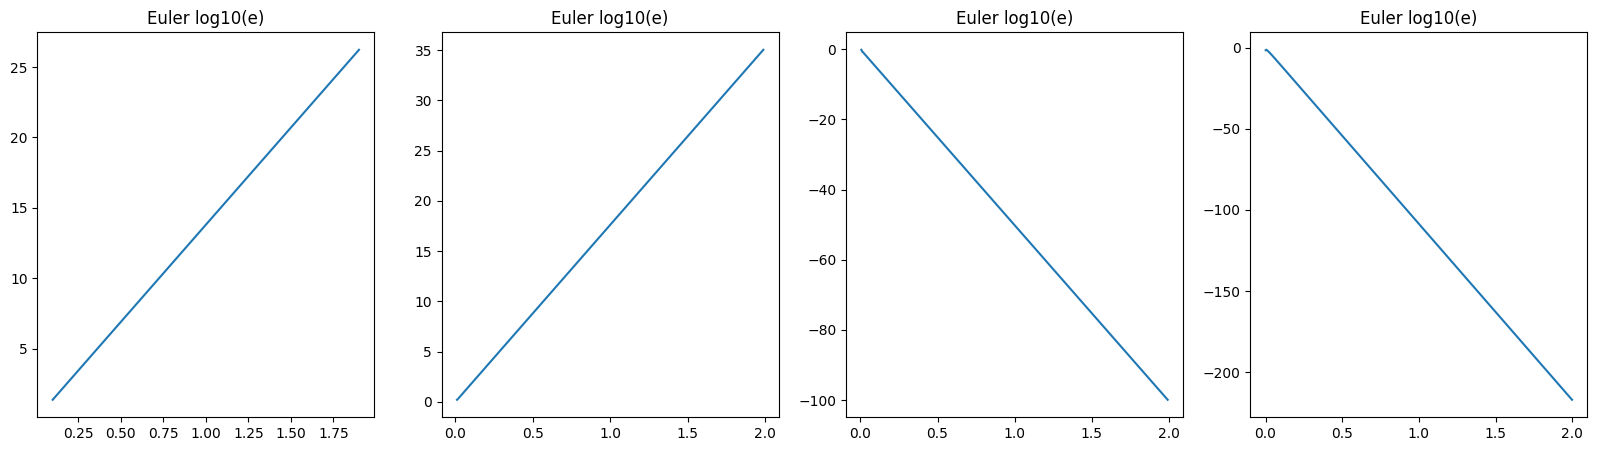

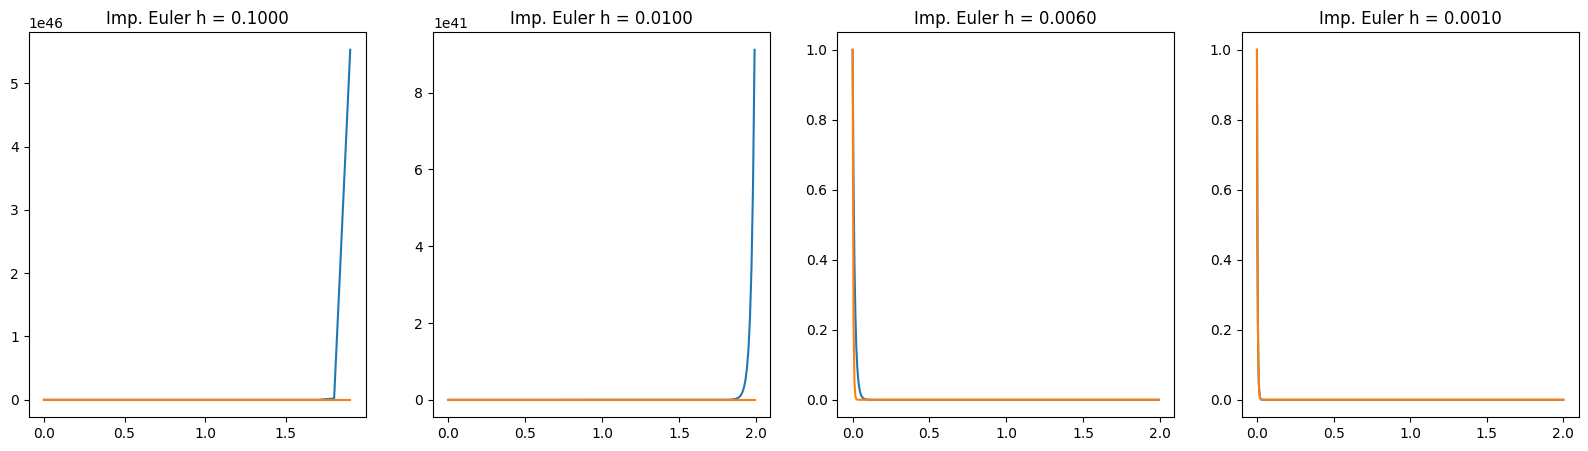

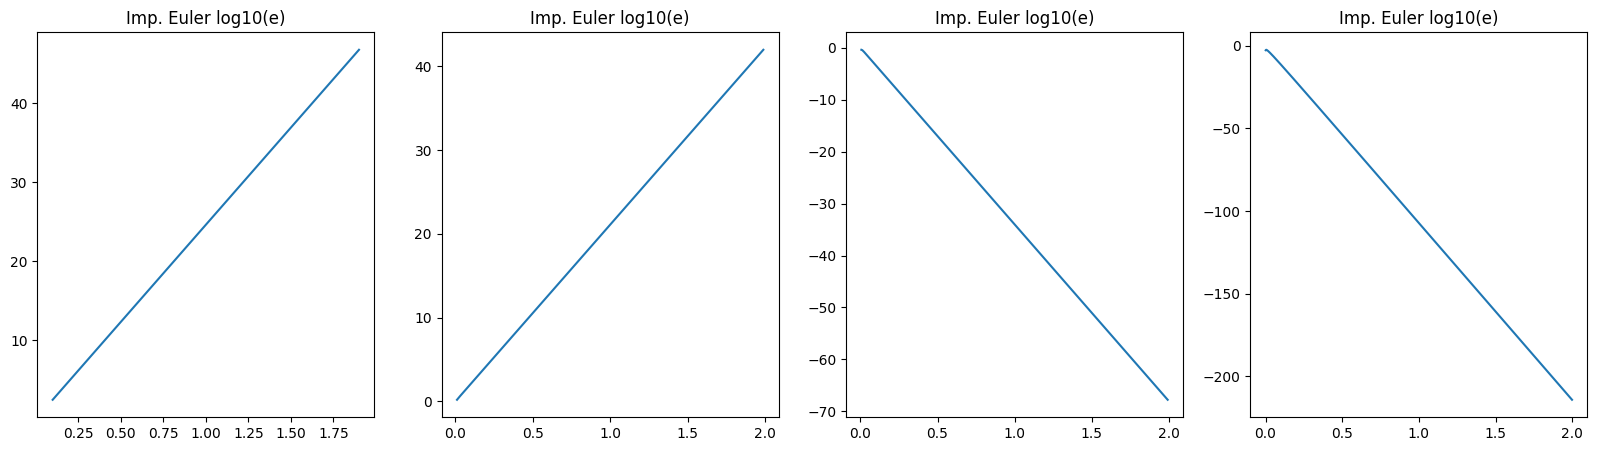

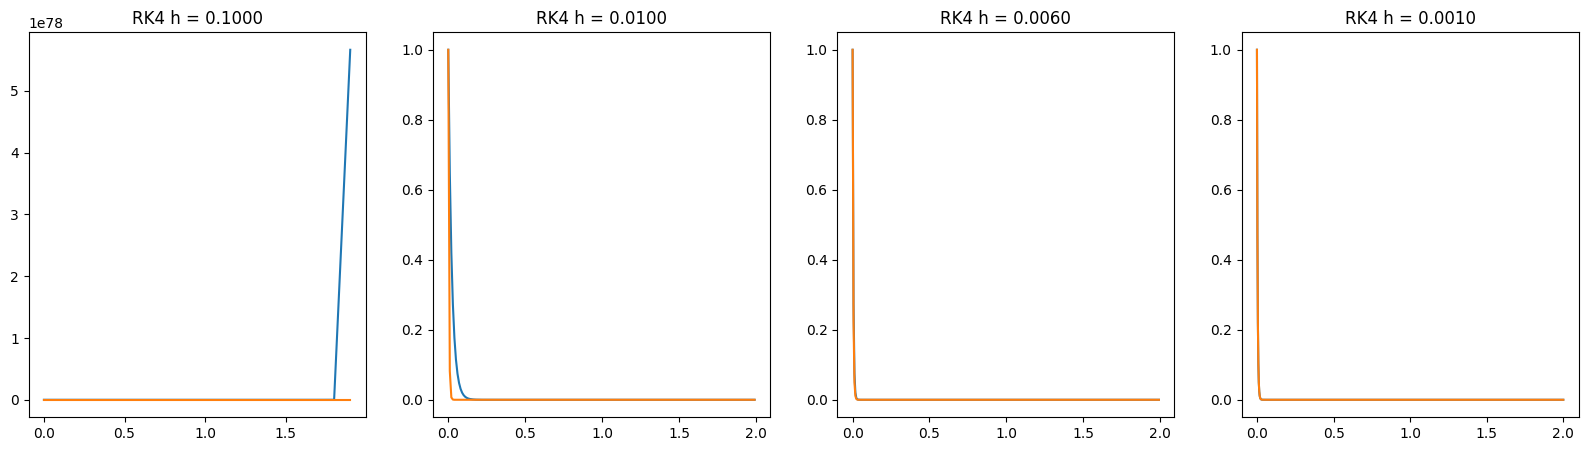

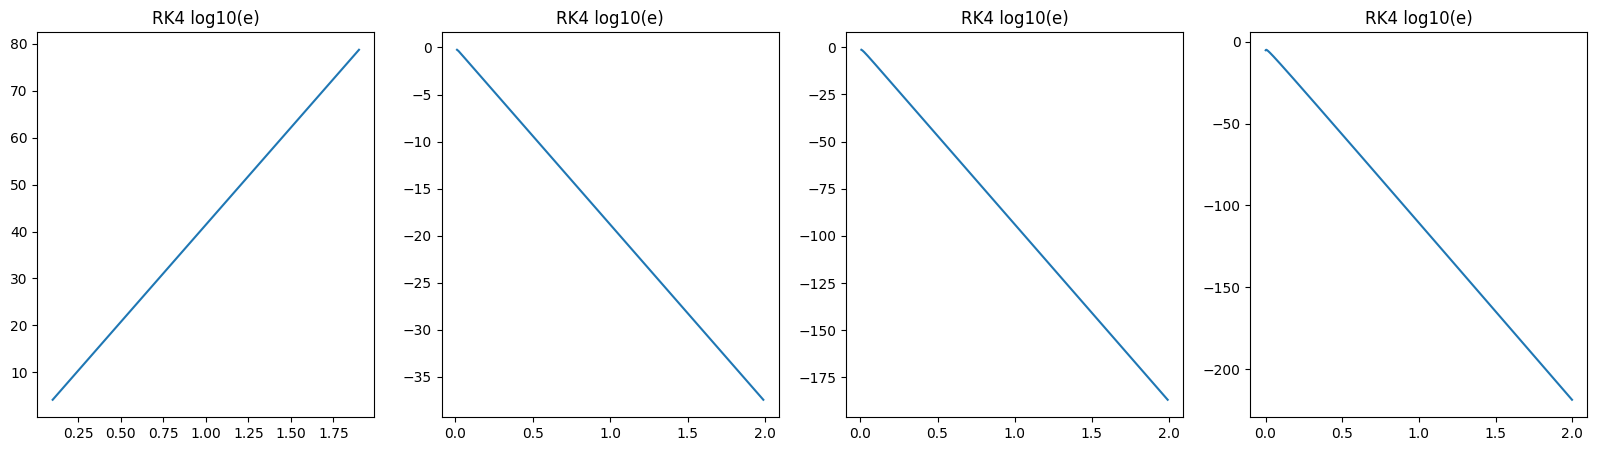

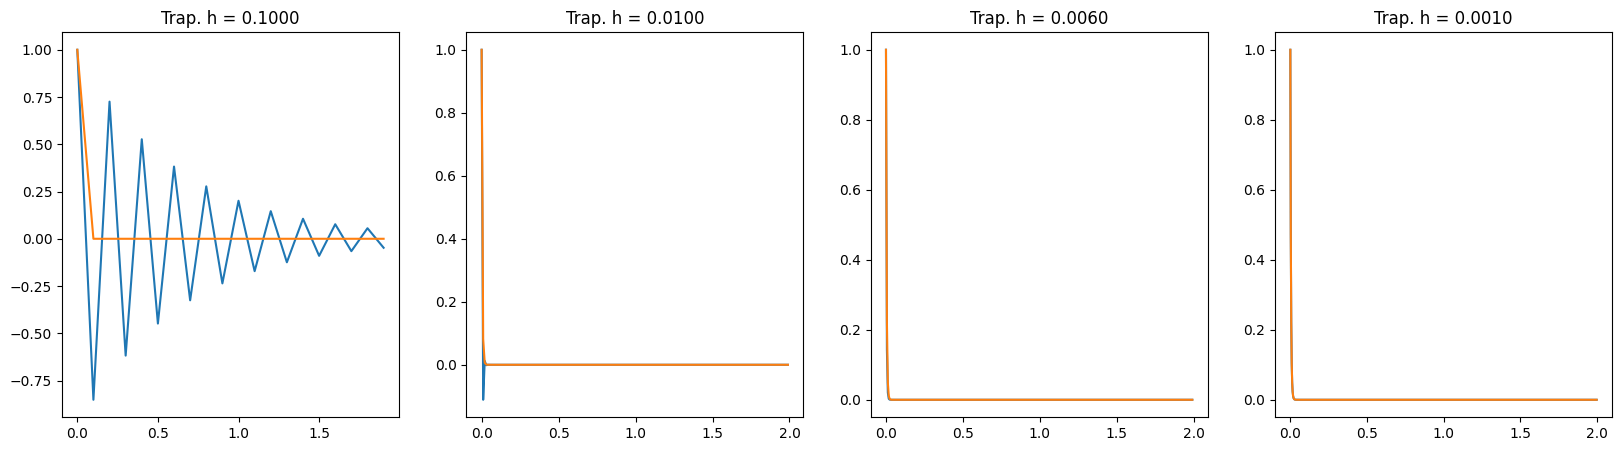

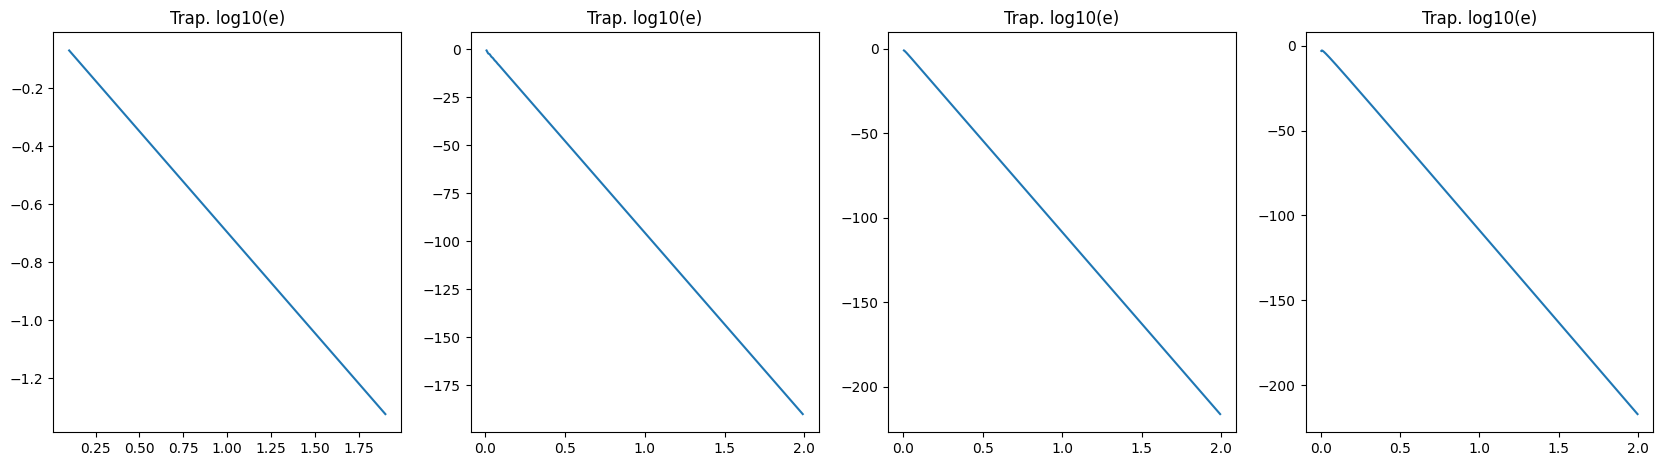

In [10]:
def F(tk,uk):
    return -250*uk
def sol(t):
    return np.exp(-250*t)
def Euler(uk,tk,h):
    return uk + h*F(tk,uk)
def Trapezoid(uk,tk,h):
    return uk*(1-0.5*h*250)/(1+0.5*h*250)
def ImprovedEuler(uk,tk,h):
    Fkk = F(tk,uk)
    return uk + 0.5*h*(Fkk + F(tk+h,uk+h*Fkk))
def RK4(uk,tk,h):
    Fkk = F(tk,uk)
    t2k = tk + 0.5*h
    u2k = uk + 0.5*h*Fkk
    F2k2k = F(t2k,u2k)
    t3k = t2k    
    u3k = uk + 0.5*h*F2k2k
    F3k3k = F(t3k,u3k)
    t4k = tk + h
    u4k = uk + h*F3k3k
    F4k4k = F(t4k,u4k)
    return uk + (h/6.)*(Fkk + 2*F2k2k + 2*F3k3k + F4k4k)
fig1e = plt.figure(figsize = (20, 5))
fig2e = plt.figure(figsize = (20, 5))
fig1ie = plt.figure(figsize = (20, 5))
fig2ie = plt.figure(figsize = (20, 5))
fig1rk = plt.figure(figsize = (20, 5))
fig2rk = plt.figure(figsize = (20, 5))
fig1tp = plt.figure(figsize = (20, 5))
fig2tp = plt.figure(figsize = (20, 5))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.1)
i = 1
hs = np.array([0.1, 0.01, 0.006, 0.001])
for h in hs:
    N = int(2 / h)
    ks = np.arange(0,N)
    t = ks*h
    Ue = np.ones(N, dtype='f8')
    Uie = np.ones(N, dtype='f8')
    Urk = np.ones(N, dtype='f8')
    Utp = np.ones(N, dtype='f8')
    S = sol(t)
    for k in ks[:-1]:
        Ue[k+1] = Euler(Ue[k],t[k],h)
        Uie[k+1] = ImprovedEuler(Uie[k],t[k],h)
        Utp[k+1] = Trapezoid(Utp[k],t[k],h)
        Urk[k+1] = RK4(Urk[k],t[k],h)
    print('h = %.4f' % h)
    t1 = int(1./h)
    print('At time = 1 where k = %d' % t1)
    print('Euler approx = %.2E' % Ue[t1])
    print('Imp. Euler approx = %.2E' % Uie[t1])
    print('RK4 approx = %.2E' % Urk[t1])
    
    ax1e = fig1e.add_subplot(1, len(hs), i)
    ax1e.set_title('Euler h = %.4f' % h)
    ax1e.plot(t,Ue)
    ax1e.plot(t, S)
    ee = np.abs(Ue - S)
    ax2e = fig2e.add_subplot(1, len(hs), i)
    ax2e.set_title('Euler log10(e)')
    ax2e.plot(t[1:],np.log10(ee[1:]))
    
    ax1ie = fig1ie.add_subplot(1, len(hs), i)
    ax1ie.set_title('Imp. Euler h = %.4f' % h)
    ax1ie.plot(t,Uie)
    ax1ie.plot(t, S)
    eie = np.abs(Uie - S)
    ax2ie = fig2ie.add_subplot(1, len(hs), i)
    ax2ie.set_title('Imp. Euler log10(e)')
    ax2ie.plot(t[1:],np.log10(eie[1:]))
    
    ax1rk = fig1rk.add_subplot(1, len(hs), i)
    ax1rk.set_title('RK4 h = %.4f' % h)
    ax1rk.plot(t,Urk)
    ax1rk.plot(t, S)
    erk = np.abs(Urk - S)
    ax2rk = fig2rk.add_subplot(1, len(hs), i)
    ax2rk.set_title('RK4 log10(e)')
    ax2rk.plot(t[1:],np.log10(erk[1:]))
    
    ax1tp = fig1tp.add_subplot(1, len(hs), i)
    ax1tp.set_title('Trap. h = %.4f' % h)
    ax1tp.plot(t,Utp)
    ax1tp.plot(t, S)
    etp = np.abs(Utp - S)
    ax2tp = fig2tp.add_subplot(1, len(hs), i)
    ax2tp.set_title('Trap. log10(e)')
    ax2tp.plot(t[1:],np.log10(etp[1:]))
    
    i = i+1

At step size 0.1 all methods diverges from the solution except the trapezoid method.

General formulation : $$\frac{du}{dt} = \lambda u,\qquad u(0) = 1$$
Then Euler methods gives : $$u_{k+1} = (1+\lambda h)^k$$

We see that:
* if $\lambda h < -2$ (i.e. $h > \frac{2}{\lambda}$ for $\lambda < 0$) the iterates change their sign at each step and grow exponentially fast in magnitude. The iterates diverges. It can be observed in our example for Euler method (first line) and $h > 0.008$.
* if $\lambda -2 < h < -1$ (i.e. $\frac{2}{\lambda} > h > \frac{1}{\lambda}$ for $\lambda < 0$) the iterates change their sign at each step but decay in magnitude. It can be observed in our example for Euler method (first line) and $0.008 > h > 0.004$.
* if $1 + \lambda h > 1$ (i.e. $\lambda > 0$) then the solution and the iterate are exponentionnaly growing.


Note that if the equation becomes a system of equations, the previous remarks are still correct if $\lambda$ is replaced by the real part of an eigenvalue of $A$(where $\dot{\mathbf{u}} = A\mathbf{u}$).

The trapezoid method is **A-stable**. Even if it oscillates for $h > 1/\lambda$ it always converges. Nevertheless it is a first order method. No Runge-Kunta method is A-stable!